In [1]:
import tensorflow as tf
import xarray as xr
import numpy as np
import os
import sys

from scipy.ndimage import gaussian_filter

In [2]:
############################
# set up the run information
############################
output_root_directory = '/glade/work/hardt/models'
model_run_name        = 'testing'
input_model_name      = 'test_model_8p.h5'
output_model_name     = 'test_model_{}.h5'

feature_data          = '/glade/work/hardt/ds612/2000-2013_June-Sept_CTRLradrefl_REFL.nc'
label_data            = '/glade/work/hardt/ds612/2000-2013_June-Sept_CTRL3D_maxW.nc'
############################

output_path = os.path.join(output_root_directory, model_run_name)
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [3]:
#
# set up the model
#
from model import unet
    
input_model = os.path.join(output_path, input_model_name)
output_model = os.path.join(output_path, output_model_name)

if not os.path.isfile(input_model):
    test_model = unet()
    test_model.save(input_model)

In Machine Learning a 
feature is the data used to do the prediction
label is what is being predicted

In [ ]:
#
# load the data
#
xds = xr.open_dataset(feature_data)
yds = xr.open_dataset(label_data)
x = xds.refl.values
y = yds.maxW.values

In [ ]:
y = gaussian_filter(y, sigma=1)
y = y[y<0.5]=0

In [ ]:
print(x.shape)
print(y.shape)

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((x[0:6112,:,:,np.newaxis ], y[0:6112,:,:,np.newaxis]))

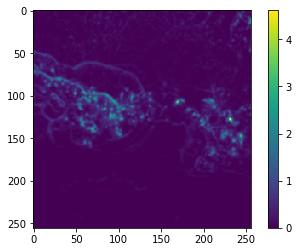

In [20]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(y[200,:,:])
plt.colorbar()

In [28]:
print(train_dataset)
len(list(train_dataset))

<TensorSliceDataset shapes: ((256, 256, 1), (256, 256, 1)), types: (tf.float32, tf.float32)>


6112

In [29]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 6112
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE, reshuffle_each_iteration=True).batch(BATCH_SIZE, drop_remainder=True)
print(train_dataset)
len(list(train_dataset))

<BatchDataset shapes: ((32, 256, 256, 1), (32, 256, 256, 1)), types: (tf.float32, tf.float32)>


191

In [8]:
val_dataset = tf.data.Dataset.from_tensor_slices((x[6113:7649,:,:,np.newaxis], y[6113:7649,:,:np.newaxis]))

In [9]:
print(val_dataset)
len(list(val_dataset))

<TensorSliceDataset shapes: ((256, 256), (256, 256)), types: (tf.float32, tf.float32)>


1536

In [10]:
val_dataset = val_dataset.batch(BATCH_SIZE, drop_remainder=True)

In [11]:
print(val_dataset)
len(list(val_dataset))

<BatchDataset shapes: ((32, 256, 256), (32, 256, 256)), types: (tf.float32, tf.float32)>


48

In [12]:
test_dataset = tf.data.Dataset.from_tensor_slices((x[7648:9568,:,:,np.newaxis], y[7648:9568,:,:np.newaxis]))

In [13]:
print(test_dataset)
len(list(test_dataset))

<TensorSliceDataset shapes: ((256, 256), (256, 256)), types: (tf.float32, tf.float32)>


1920

In [14]:
test_dataset = test_dataset.batch(BATCH_SIZE, drop_remainder=True)

In [15]:
print(test_dataset)
len(list(test_dataset))

<BatchDataset shapes: ((32, 256, 256), (32, 256, 256)), types: (tf.float32, tf.float32)>


60

In [6]:
model = tf.keras.models.load_model(input_model)

In [ ]:
#
# Here is where the work is done
#
model.fit(train_dataset, epochs=100)

Train for 91 steps
Epoch 1/500
91/91 [==============================] - 97s 1s/step - loss: 0.0324 - accuracy: 0.9996
Epoch 2/500
91/91 [==============================] - 91s 998ms/step - loss: 0.0324 - accuracy: 0.9996
Epoch 3/500
91/91 [==============================] - 91s 1s/step - loss: 0.0324 - accuracy: 0.9996
Epoch 4/500
91/91 [==============================] - 92s 1s/step - loss: 0.0324 - accuracy: 0.9996
Epoch 5/500
91/91 [==============================] - 92s 1s/step - loss: 0.0324 - accuracy: 0.9996
Epoch 6/500
91/91 [==============================] - 92s 1s/step - loss: 0.0324 - accuracy: 0.9996
Epoch 7/500
91/91 [==============================] - 91s 1s/step - loss: 0.0324 - accuracy: 0.9996
Epoch 8/500
91/91 [==============================] - 92s 1s/step - loss: 0.0324 - accuracy: 0.9996
Epoch 9/500
91/91 [==============================] - 92s 1s/step - loss: 0.0324 - accuracy: 0.9996
Epoch 10/500
91/91 [==============================] - 92s 1s/step - loss: 0.0324 - accu

In [ ]:
import time
t = time.localtime()
d = [str(k) for k in t]
model.save(output_model.format("_".join(d[:5])))